### HOJA DE TRABAJO 2

KENNETH GALVEZ 20079

JESSICA ORTIZ 20192

ESTEBAN ALDANA 20591

In [13]:
# Importando bibliotecas necesarias
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F



### Task 1 - Preparación del conjunto de datos

Cargue el conjunto de datos de Iris utilizando bibliotecas como sklearn.datasets. Luego, divida el conjunto de datos
en conjuntos de entrenamiento y validación.


In [14]:
# Cargando el conjunto de datos de Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividiendo el conjunto de datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Conviértelos a tensores de PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_val = torch.FloatTensor(X_val)
y_val = torch.LongTensor(y_val)
# Convertir a one-hot encoding
y_train_onehot = F.one_hot(y_train, num_classes=output_size).float()
y_val_onehot = F.one_hot(y_val, num_classes=output_size).float()


### Task 2 - Arquitectura modelo
Cree una red neuronal feedforward simple utilizando nn.Module de PyTorch. Luego, defina capa de entrada, capas
ocultas y capa de salida. Después, elija las funciones de activación y el número de neuronas por capa.

In [15]:
# Definir la arquitectura del modelo
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size, regularization):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, output_size)
        self.dropout = nn.Dropout(0.2) if regularization == 'Dropout' else None

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        if self.dropout is not None:
            x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        if self.dropout is not None:
            x = self.dropout(x)
        x = self.fc3(x)
        return x

In [16]:
# Configuración de hiperparámetros
input_size = X_train.shape[1]
output_size = len(torch.unique(y_train))
num_epochs = 50
learning_rate = 0.01

best_accuracy = 0
best_combo = None

### Task 3- Funciones de Pérdida



In [17]:
# Possible loss functions
loss_functions = ['CrossEntropy', 'MSE', 'Poisson']

#### Task 4-5-6 - Experimentación y Análisis
Entrene los modelos con diferentes combinaciones de funciones de pérdida, técnicas de regularización y
algoritmos de optimización. Para no complicar esta parte, puede dejar fijo dos de estos parámetros (función de
pérdida, técnicas de regularización, algoritmo de optimización) y solamente cambiar uno de ellos. Deben verse al
menos 9 combinaciones en total, donde es válido que en una de ellas no haya ninguna técnica de regularización. Si
quiere experimentar con más combinaciones se le dará hasta 10% de puntos extra.
Para cada combinación registre métricas como precisión, pérdida y alguna otra métrica que considere pertinente
(Recuerde lo visto en inteligencia artificial).
Visualice las curvas (tanto en precisión, pérdida y la tercera métrica que decidió) de entrenamiento y validación
utilizando bibliotecas como matplotlib y/o seaborn. Además, recuerde llevar tracking de los tiempos de ejecución
de cada combinación

Loss function: CrossEntropy, Regularization: L1, Optimizer: SGD, Validation Accuracy: 0.7, Time: 0.05553078651428223s
Loss function: CrossEntropy, Regularization: L1, Optimizer: Adam, Validation Accuracy: 1.0, Time: 0.06699991226196289s
Loss function: CrossEntropy, Regularization: L1, Optimizer: RMSprop, Validation Accuracy: 0.8, Time: 0.0565645694732666s
Loss function: CrossEntropy, Regularization: L2, Optimizer: SGD, Validation Accuracy: 0.7, Time: 0.030691146850585938s
Loss function: CrossEntropy, Regularization: L2, Optimizer: Adam, Validation Accuracy: 0.9666666666666667, Time: 0.051694393157958984s
Loss function: CrossEntropy, Regularization: L2, Optimizer: RMSprop, Validation Accuracy: 0.8333333333333334, Time: 0.061014413833618164s
Loss function: CrossEntropy, Regularization: Dropout, Optimizer: SGD, Validation Accuracy: 0.4, Time: 0.06052899360656738s
Loss function: CrossEntropy, Regularization: Dropout, Optimizer: Adam, Validation Accuracy: 0.9666666666666667, Time: 0.0735015

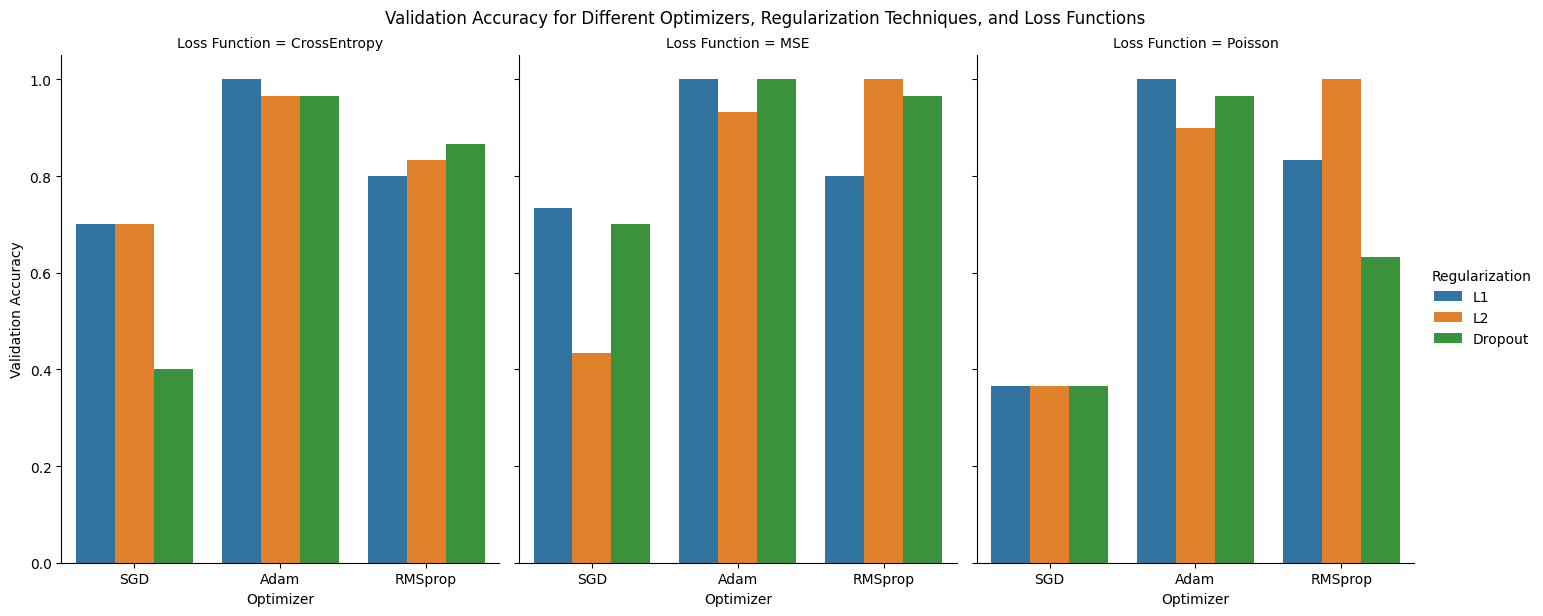

The best combination was Loss function: CrossEntropy, Regularization: L1, Optimizer: Adam with a Validation Accuracy of 1.0


In [22]:
# Almacena resultados para su posterior análisis
results = []

# Realizar todas las combinaciones posibles
for loss_function_name in loss_functions:
    for regularization in ['L1', 'L2', 'Dropout']:
        for optimizer_name in ['SGD', 'Adam', 'RMSprop']:
            
            start_time = time.time()
            
            model = SimpleNN(input_size, output_size, regularization=regularization)
            
            # Establecer la función de pérdida
            if loss_function_name == 'CrossEntropy':
                loss_function = nn.CrossEntropyLoss()
            elif loss_function_name == 'MSE':
                loss_function = nn.MSELoss()
            elif loss_function_name == 'Poisson':
                loss_function = nn.PoissonNLLLoss()
            
            # Establecer el optimizador
            if optimizer_name == 'SGD':
                optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=(1e-4 if regularization == 'L2' else 0))
            elif optimizer_name == 'Adam':
                optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=(1e-4 if regularization == 'L2' else 0))
            elif optimizer_name == 'RMSprop':
                optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=(1e-4 if regularization == 'L2' else 0))
            
            # Entrenamiento del modelo
            for epoch in range(num_epochs):
                model.train()
                optimizer.zero_grad()
                outputs = model(X_train)
                # Dentro del ciclo de entrenamiento
                if loss_function_name == 'MSE' :
                    loss = loss_function(outputs, y_train_onehot)
                elif loss_function_name == 'Poisson' :
                    loss = loss_function(outputs, y_train_onehot)
                else:
                    loss = loss_function(outputs, y_train)
                
                if regularization == 'L1':
                    l1_lambda = 1e-4
                    l1_norm = sum(p.abs().sum() for p in model.parameters())
                    loss += l1_lambda * l1_norm
                
                loss.backward()
                optimizer.step()

            # Validación del modelo
            model.eval()
            val_outputs = model(X_val)
            _, predicted = torch.max(val_outputs, 1)
            accuracy = accuracy_score(y_val.cpu(), predicted.cpu())
            
            end_time = time.time()
            elapsed_time = end_time - start_time
            
            results.append({
                'Loss Function': loss_function_name,
                'Regularization': regularization,
                'Optimizer': optimizer_name,
                'Validation Accuracy': accuracy,
                'Execution Time': elapsed_time
            })
            
            print(f'Loss function: {loss_function_name}, Regularization: {regularization}, Optimizer: {optimizer_name}, Validation Accuracy: {accuracy}, Time: {elapsed_time}s')
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_combo = (loss_function_name, regularization, optimizer_name)

# Crear un DataFrame con los resultados
df = pd.DataFrame(results)

# Visualizar los resultados usando seaborn
sns.catplot(x="Optimizer", y="Validation Accuracy", hue="Regularization", 
            col="Loss Function", data=df, kind="bar", height=6, aspect=0.8)
plt.suptitle("Validation Accuracy for Different Optimizers, Regularization Techniques, and Loss Functions", y=1.02)
plt.show()

print(f'The best combination was Loss function: {best_combo[0]}, Regularization: {best_combo[1]}, Optimizer: {best_combo[2]} with a Validation Accuracy of {best_accuracy}')

### Task 7- Discusión
Discuta los resultados obtenidos de diferentes modelos. Compare la velocidad de convergencia y el rendimiento
final de modelos utilizando diferentes funciones de pérdida, técnicas de regularización, y algoritmos de
optimización. Explore y discuta por qué ciertas técnicas podrían conducir a un mejor rendimiento. tanto técnicas de
regularización, funciones de pérdida como algoritmos de optimización.